In [8]:
import numpy as np
import pylab
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('test_data.txt',sep='\t',names=['day', 'vv', 'clicks', 'targets'])
df['variant'] = df['vv']

In [10]:
df1 = df.groupby([pd.Grouper(key = "vv")]).agg({'day':'count','variant':'sum','clicks':'sum','targets':'sum'})
df1['variant'] = df1['variant']//df1['day']
df1['cr'] = 100*df1['targets'] / df1['clicks']
df1 = df1.sort_values('cr', ascending=False).head(10)
df1

day  variant  clicks  targets          cr
vv                                              
57145    1    57145       4       10  250.000000
61501    1    61501       6       11  183.333333
62054    1    62054       5        7  140.000000
61761    1    61761      10       11  110.000000
57875    1    57875      14       11   78.571429
67466    1    67466       9        7   77.777778
73289    3    73289    2133     1301   60.993905
62641    1    62641      17       10   58.823529
73284    6    73284    2403     1210   50.353725
65559    1    65559      14        7   50.000000

In [11]:
df2 = df.merge(df1['variant'], on='variant')
df2['crday'] = 100*df2['targets'] / df2['clicks']
df2

day     vv  clicks  targets  variant       crday
0     7  57875      14       11    57875   78.571429
1     8  67466       9        7    67466   77.777778
2    10  62054       5        7    62054  140.000000
3    13  61761      10       11    61761  110.000000
4    16  57145       4       10    57145  250.000000
5    18  62641      17       10    62641   58.823529
6    21  73284     311      143    73284   45.980707
7    22  73284    1293      736    73284   56.921887
8    23  73284     584      291    73284   49.828767
9    24  73284      24       19    73284   79.166667
10   25  73284      74       11    73284   14.864865
11   27  73284     117       10    73284    8.547009
12   21  73289    1607     1033    73289   64.281269
13   22  73289     470      263    73289   55.957447
14   25  73289      56        5    73289    8.928571
15   28  61501       6       11    61501  183.333333
16   28  65559      14        7    65559   50.000000

In [12]:
del df2['day']
del df2['vv'] 
del df2['targets'] 
del df2['clicks']

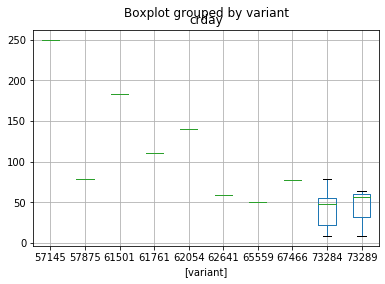

In [6]:
boxplot = df2.boxplot(by='variant')

Лучшими оказались вариации, которые кликались всего один день и не более 17 раз. Такая выборка не имеет статистической значимости. Это похоже на пример с футболистом - героем Пьера Ришара. Не имея статистически значимой выборки, нужно полагаться на опыт и здравый смысл, которые позволят оценить вариацию при ограниченном доступе к эмпирическим данным, цена тестирования гипотезы может быть высока.

Еще две вариации тестировались на более объемных выборках в 3 и 6 дней соответственно. В обоих случаях медиана смещена ближе к верхнему квартилю, а хронологически CR и общее количество кликов в первые дни велики, а затем стремительно уменьшаются, что говорит об эффекте новизны: пользователи заинтригованы в первые дни (возможно, рекламой), а затем интерес спадает.